# CNN Deep Learning Prototype

## Import necessary utilities and packages 

In [2]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import random
import os

## Loading Image Dataset from Local Directory

In [3]:
# direct the listdr to the location of the Dataset 
filenames = os.listdir('C:\\Users\\USER\\Desktop\\Image Classification\\Ethnic_Class_Dataset\\Training_Dataset')

# the categories are set as labels where chinese = 0, indian = 1, malay = 2
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'chinese': 
        categories.append(0)  
    elif category == 'indian': 
        categories.append(1)
    elif category == 'malay':
        categories.append(2)
        
# Creating 2D Data Frame to store the images according to its category        
df = pd.DataFrame({
    'filename': filenames,  
    'category': categories,    
})
# Display the list of images 
df

,filename,category
0,chinese.018.png,0
1,chinese.019.png,0
2,chinese.020.png,0
3,chinese.022.png,0
4,chinese.024.png,0
...,...,...
85,malay.054.png,2
86,malay.055.png,2
87,malay.057.png,2
88,malay.058.png,2


0    30
1    30
2    30
Name: category, dtype: int64

 Total images:  90


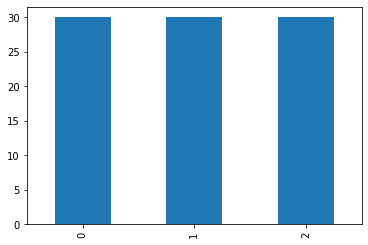

In [4]:
# Display the total images in every category

df['category'].value_counts().plot.bar()
print(df['category'].value_counts())

print("\n Total images: ", df.shape[0])

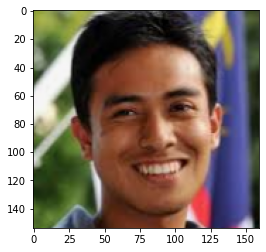

In [5]:
# Retrieving a single random image for example 

sample = random.choice(filenames)
image = load_img('C:\\Users\\USER\\Desktop\\Image Classification\\Ethnic_Class_Dataset\\Training_Dataset\\'+sample)
plt.imshow(image)


## Modelling Convolutional Neural Network (CNN) 

In [6]:
# Modelling the CNN Model based on the proposed architecture

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(690, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax')) # 3 because we have malay, indian and chinese

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [7]:
# Condition for the model to stop training.

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001) 
callbacks = [earlystop, learning_rate_reduction]


In [8]:
# Replacing the header number with ethnic group name category

df["category"] = df["category"].replace({ 0: 'chinese', 1: 'indian', 2: 'malay' })
df["category"].head()

0    chinese
1    chinese
2    chinese
3    chinese
4    chinese
Name: category, dtype: object

malay      18
indian     18
chinese    18
Name: category, dtype: int64

 Total train images:  54


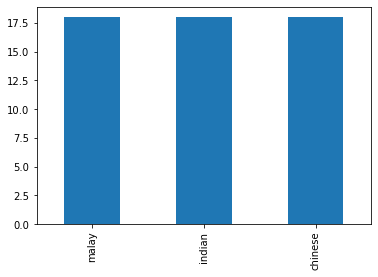

In [9]:
# Train and validation data split 60% and 40%

train_df, validate_df = train_test_split(df, test_size=0.40, random_state=0) 

# Lets see total 'TRAIN' files and in each category
train_df = train_df.reset_index(drop=True)

train_df['category'].value_counts().plot.bar()
print(train_df['category'].value_counts())
print("\n Total train images: ", train_df.shape[0])

malay      12
chinese    12
indian     12
Name: category, dtype: int64

 Total validate images:  36


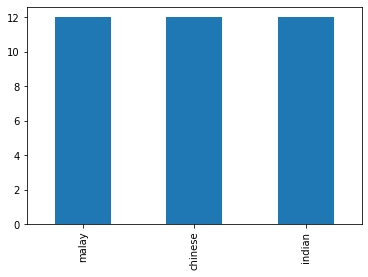

In [10]:
# Display total validation images in every category

validate_df = validate_df.reset_index(drop=True)
validate_df['category'].value_counts().plot.bar()

print(validate_df['category'].value_counts())
print("\n Total validate images: ", validate_df.shape[0])

In [11]:
# Confirm the total train and validation images

total_train = train_df.shape[0]
print("Total train images:", total_train)

total_validate = validate_df.shape[0] 
print("Total validate images:", total_validate)

Total train images: 54
Total validate images: 36


## Data Augmentation

In [12]:
# Data augmentation for train data 
train_datagen = ImageDataGenerator(
                                    rotation_range=15,
                                    rescale=1./255,
                                    shear_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1
)

# Data augmentation for validate data
validation_datagen = ImageDataGenerator(rescale=1./255)

# Storing the augmented train images into the dataframe
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "C:\\Users\\USER\\Desktop\\Image Classification\\Ethnic_Class_Dataset\\Training_Dataset\\", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size= 9
)
# Storing the augmented validate images into the dataframe
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:\\Users\\USER\\Desktop\\Image Classification\\Ethnic_Class_Dataset\\Training_Dataset\\", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size= 9
)

Found 54 validated image filenames belonging to 3 classes.
Found 36 validated image filenames belonging to 3 classes.


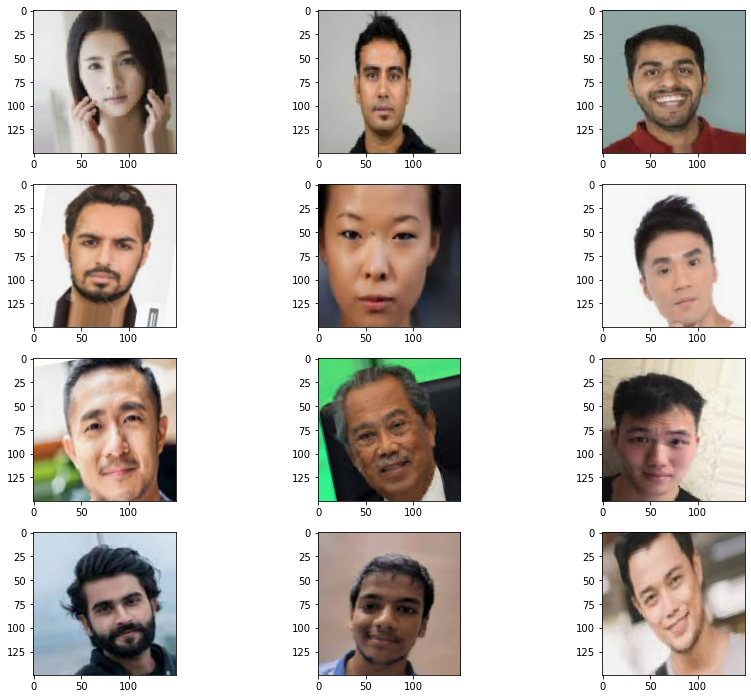

In [13]:
# Display the augmented images to see the resukt of the augmentation

plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## Training the dataset using the CNN model

In [14]:
#Train the tarin and validate dataset using model.fit 

epochs=11
batch_size=11

history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate/batch_size,
    steps_per_epoch=total_train/batch_size,
    callbacks=callbacks
)

Epoch 1/11
4/4 [==============================] - 10s 2s/step - loss: 10.3324 - accuracy: 0.3556 - val_loss: 1.9134 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/11
4/4 [==============================] - 9s 2s/step - loss: 2.9260 - accuracy: 0.3333 - val_loss: 1.2161 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/11
4/4 [==============================] - 8s 2s/step - loss: 1.3425 - accuracy: 0.3111 - val_loss: 1.0932 - val_accuracy: 0.4167 - lr: 0.0010
Epoch 4/11
4/4 [==============================] - 7s 2s/step - loss: 1.0753 - accuracy: 0.4000 - val_loss: 1.0964 - val_accuracy: 0.4167 - lr: 0.0010
Epoch 5/11
4/4 [==============================] - 7s 2s/step - loss: 1.1117 - accuracy: 0.3333 - val_loss: 1.0978 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 6/11
4/4 [==============================] - 7s 1s/step - loss: 1.0870 - accuracy: 0.3778 - val_loss: 1.0988 - val_accuracy: 0.3056 - lr: 0.0010
Epoch 7/11
4/4 [==============================] - 6s 1s/step - loss: 1.0842 - accuracy: 0.3556 - v

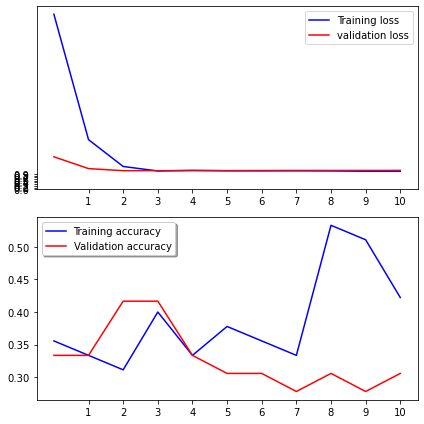

In [15]:
# Plot tables to interpret the results from traiining model summary 

# Table of training and validation  loss
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.legend()

# Table of training and validation  accuracy 
ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
ax2.legend()

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [16]:
#model2.save('trained_model_1.hdf5')

#"""
#from keras import models    
#model = models.load_model('trained_model_1.hdf5', compile = False)
#"""

## Loading Test Image Dataset from Local Directory

In [17]:
# Loading test images from directory
test_filenames = os.listdir("C:\\Users\\USER\\Desktop\\Image Classification\\Ethnic_Class_Dataset\\Test_Dataset")

# Store images into 2d Data Frame
test_df = pd.DataFrame({
    'filename': test_filenames
})

In [18]:
# View the total of test images 
total_test = test_df.shape[0]  
print("Total amount of test images are:", total_test)


Total amount of test images are: 15


## Data Augmentation for Test  

In [19]:
# Data augmentation for test dataset

test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 11

test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    "C:\\Users\\USER\\Desktop\\Image Classification\\Ethnic_Class_Dataset\\Test_Dataset",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(150,150),
    batch_size=batch_size,
    shuffle=False 
)

Found 15 validated image filenames.


## Do Prediction Test for the test images using the Trained model

In [20]:
# Prediction test using model.predict
predict = model.predict(test_generator, steps=np.ceil(total_test/batch_size))


# Return the total of predicted images     
print("Number of predicted images:", len(predict), "\n")

# Obtain predictions test in array form according to ethnic group
# These are labels 0, 1, 2 (category). Use [?:?] to specify range of index in array list

print("    0:chinese        1:indian       2:malay \n\n", predict, "\n")   

Number of predicted images: 15 

    0:chinese        1:indian       2:malay 

 [[0.3208924  0.3440896  0.33501798]
 [0.33222237 0.33724773 0.33052996]
 [0.31675848 0.34392592 0.33931556]
 [0.33462867 0.3337156  0.33165574]
 [0.32931596 0.33960575 0.33107826]
 [0.33158568 0.33727485 0.33113948]
 [0.32811055 0.33341408 0.33847538]
 [0.3257071  0.34904975 0.32524312]
 [0.33280164 0.33591458 0.33128378]
 [0.3264489  0.3449867  0.32856435]
 [0.32680747 0.32698524 0.34620732]
 [0.30270466 0.39016142 0.30713385]
 [0.3377677  0.32399613 0.33823615]
 [0.321954   0.35015637 0.32788956]
 [0.33819464 0.32302213 0.33878323]] 



In [21]:
# Find max value in the array to determine predicted images as highest value refers to the highest probability
test_df['category'] = np.argmax(predict, axis=-1) 

# Display some predicted values for example
# Use [?:?] to specify range 

print(test_df['category'][0:3]) 

0    1
1    1
2    1
Name: category, dtype: int64


In [22]:
# Replacing the number to ethnic class name as the categories from predicted test

print(train_generator.class_indices) 
print(validation_generator.class_indices, "\n")

# Map labels 
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
print(label_map, "\n")

# See the output of mapped labels
print(test_df['category'][0:4], "\n")

# Lets replace letters with words to see better
print(test_df['category'][0:3])

{'chinese': 0, 'indian': 1, 'malay': 2}
{'chinese': 0, 'indian': 1, 'malay': 2} 

{0: 'chinese', 1: 'indian', 2: 'malay'} 

0     indian
1     indian
2     indian
3    chinese
Name: category, dtype: object 

0    indian
1    indian
2    indian
Name: category, dtype: object


indian     10
malay       4
chinese     1
Name: category, dtype: int64

Total predicted images: 15


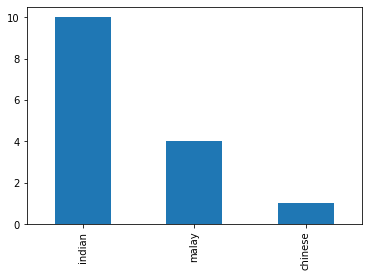

In [23]:
# Return the total of predicted test images in every category

test_df['category'].value_counts()
print(test_df['category'].value_counts())

# View the above in a bar graph
test_df['category'].value_counts().plot.bar()

# Lets print the total predicted images 
print("\nTotal predicted images:", test_df.shape[0])

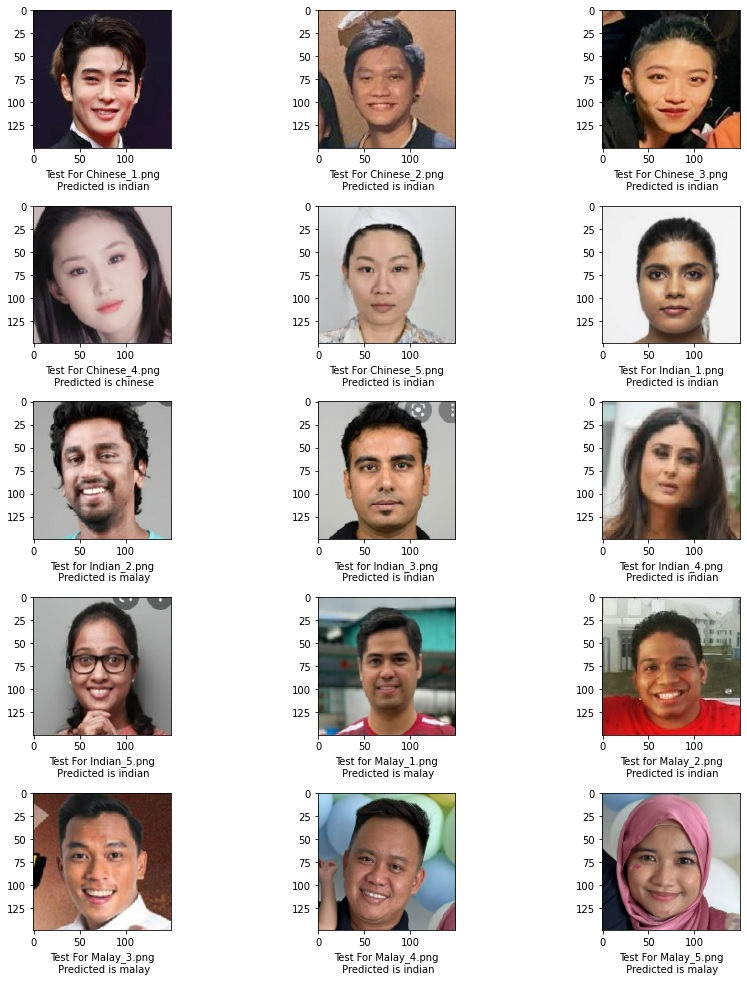

In [24]:
# Display the result of the prediction test using plot. Can compare the truth and its prediction.

sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C:\\Users\\USER\\Desktop\\Image Classification\\Ethnic_Class_Dataset\\Test_Dataset\\"+filename, target_size=(150,150)) #rescale(1./255)
    plt.subplot(9, 3, index+1)      
    plt.imshow(img)
    
    plt.xlabel(filename + "\n Predicted is " + "{}".format(category))
plt.tight_layout()
plt.show()

In [25]:
# Save the result of the prediction into the csv files 

submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('Result_Test_Dataset.csv', index=False)

submission_df.head(300)

,id,label
0,Test For Chinese_1,indian
1,Test For Chinese_2,indian
2,Test For Chinese_3,indian
3,Test For Chinese_4,chinese
4,Test For Chinese_5,indian
5,Test For Indian_1,indian
6,Test for Indian_2,malay
7,Test for Indian_3,indian
8,Test for Indian_4,indian
9,Test For Indian_5,indian
